In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize and reshape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Convert labels to text
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

def label_to_text(label):
    return f"item is {class_names[label]}"

y_train_text = [label_to_text(label) for label in y_train]
y_test_text = [label_to_text(label) for label in y_test]


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizer for text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(y_train_text)
vocab_size = len(tokenizer.word_index) + 1

# Encode texts
y_train_sequences = tokenizer.texts_to_sequences(y_train_text)
y_test_sequences = tokenizer.texts_to_sequences(y_test_text)

# Pad sequences to the same length
max_length = max(len(seq) for seq in y_train_sequences)
y_train_padded = pad_sequences(y_train_sequences, maxlen=max_length)
y_test_padded = pad_sequences(y_test_sequences, maxlen=max_length)


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Reshape, Conv2DTranspose, BatchNormalization, UpSampling2D

# Text encoder
text_input = Input(shape=(max_length,))
text_embedding = Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length)(text_input)
text_lstm = LSTM(128)(text_embedding)

# Image generator
image_input = Dense(7*7*64, activation='relu')(text_lstm)
image_input = Reshape((7, 7, 64))(image_input)

# Upsample to 14x14
image_input = UpSampling2D(size=(2, 2))(image_input)
image_input = Conv2DTranspose(64, (5, 5), activation='relu', padding='same')(image_input)
image_input = BatchNormalization()(image_input)

# Upsample to 28x28
image_input = UpSampling2D(size=(2, 2))(image_input)
image_output = Conv2DTranspose(1, (5, 5), activation='sigmoid', padding='same')(image_input)

model = Model(inputs=text_input, outputs=image_output)
model.compile(optimizer='adam', loss='binary_crossentropy')



c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
model.fit(y_train_padded, x_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 127s 148ms/step - loss: 0.4201 - val_loss: 0.3969
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 148s 156ms/step - loss: 0.3944 - val_loss: 0.3934
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 115s 154ms/step - loss: 0.3931 - val_loss: 0.3932
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 118s 158ms/step - loss: 0.3933 - val_loss: 0.3936
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 112s 149ms/step - loss: 0.3934 - val_loss: 0.3932
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 109s 145ms/step - loss: 0.3926 - val_loss: 0.3930
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 143s 146ms/step - loss: 0.3929 - val_loss: 0.3925
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 142s 189ms/step - loss: 0.3934 - val_loss: 0.3925
Epoch 9/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 189s 252ms/step - loss: 0.3924 - val_loss: 0.3925
Epoch 10/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 215s 286ms/step - loss: 0.3931 - val_loss: 0.3926


In [8]:
model.save('did.h5')

In [6]:
def generate_image_from_text(text):
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=max_length)
    generated_image = model.predict(padded_seq)
    return generated_image.reshape(28, 28)

# Example
text = "item is T-shirt/top"
image = generate_image_from_text(text)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


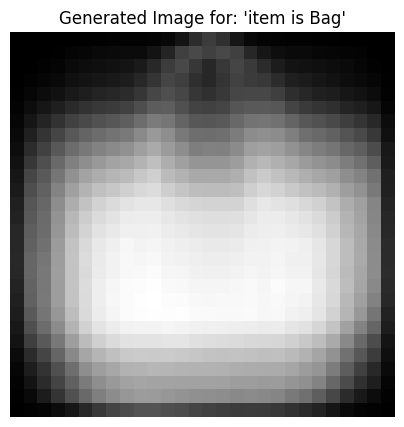

In [10]:
import matplotlib.pyplot as plt

def generate_image_from_text(text):
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=max_length)
    generated_image = model.predict(padded_seq)
    return generated_image.reshape(28, 28)

# Example text
text = "item is Bag"
image = generate_image_from_text(text)

# Plot the generated image
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title(f"Generated Image for: '{text}'")
plt.axis('off')
plt.show()
